# Chapter 8: Statistical Tests

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm

## Test With Numeric Data

In [2]:
admission = pd.read_csv('../data/admission.csv')

In [3]:
admission.head()

,GPA,GMAT,De
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


In [4]:
admission.std()['GMAT'], admission.mean()['GMAT'], admission.quantile(.75)['GMAT']

(81.52234661244044, 488.4470588235294, 538.0)

In [5]:
def p_2tail(sampdist,tstat):
    hyp = np.mean(sampdist)
    cutoff1 = hyp - np.abs(hyp - tstat)
    cutoff2 = hyp + np.abs(hyp - tstat)
    
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
    plt.show()
    
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
    return pvalue

***Mean***

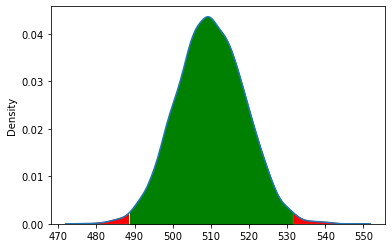

0.014

In [6]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=510, scale=admission.std()['GMAT'])
    return np.mean(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.mean()['GMAT']
p_2tail(sampdist,tstat)

***Standard Deviation***

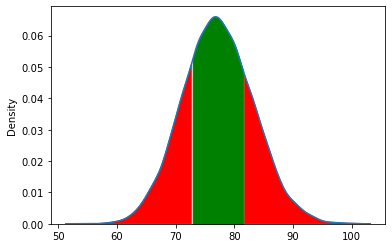

0.4737

In [7]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    mu = admission.mean()['GMAT']
    s1 = np.random.normal(size=sampsize, loc=mu, scale=78)
    return np.std(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.std()['GMAT']
p_2tail(sampdist,tstat)

***Median***

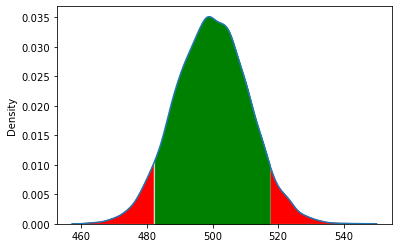

0.1043

In [8]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=500, scale=admission.std()['GMAT'])
    return np.median(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.median()['GMAT']
p_2tail(sampdist,tstat)

***Percentile***

In [9]:
norm.ppf(0.75)

0.6744897501960817

In [10]:
newm = 600 - (norm.ppf(0.75) * admission.std()['GMAT'])
print(newm)

545.0140127979766


In [11]:
norm.ppf(q=0.75, loc = newm, scale = admission.std()['GMAT'])

600.0

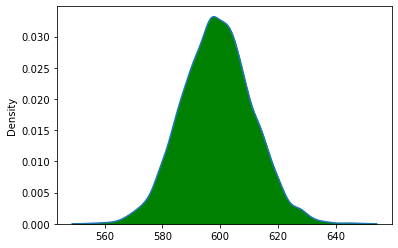

0.0

In [12]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=newm, scale=admission.std()['GMAT'])
    return np.quantile(s1, 0.75)
sampdist = [f1() for _ in range(10000)]
tstat = admission.quantile(.75)['GMAT']
p_2tail(sampdist,tstat)

***Normality Test***

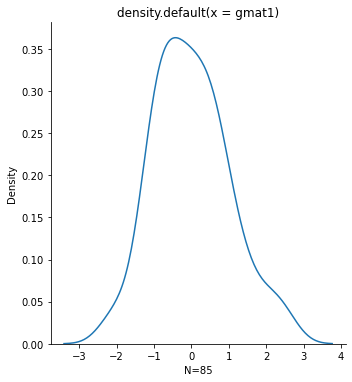

In [13]:
from sklearn.preprocessing import scale

gmat1 = scale(admission['GMAT'])
sns.displot(gmat1, kind = 'kde')
plt.xlabel('N=85')
plt.ylabel('Density')
plt.title('density.default(x = gmat1)')
plt.show()

Let's plot a normal distribution for the comparision with the distribution of the sample:

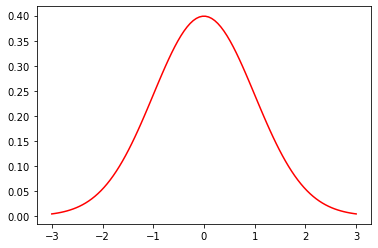

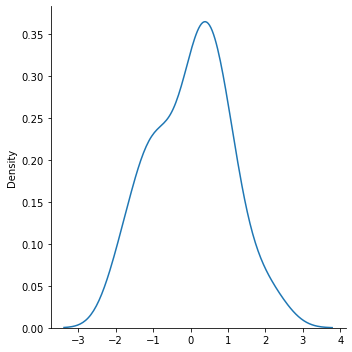

In [14]:
np.random.seed(87654321)
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x, loc = 0, scale = 1), color='r')

s1 = np.random.normal(size=50, loc=0, scale=1)
sns.displot(s1, kind = 'kde')
plt.show()